<h3>Import packages<h3>

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

<h3>Confusion matrix function<h3>

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

<h3>Load the dataset<h3>

In [3]:
df = pd.read_csv('data.csv',encoding = "utf-8")
df = df.fillna(df.mean())
X = df.drop('Wage',axis=1)
y = df['Wage']
df.head()

,Wage,Age,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Weight,Crossing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,1,31,94,94,1,5.0,4.0,4.0,159.0,84.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,1,31,91,91,0,5.0,4.0,3.0,190.0,77.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
2,1,32,91,91,0,4.0,4.0,4.0,146.0,86.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
3,1,33,94,94,0,5.0,4.0,5.0,183.0,84.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
4,1,32,91,91,0,4.0,3.0,3.0,181.0,66.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0


<h3>Slice taining and testing data (70%taining、30%testing)<h3>

In [16]:
#Slice taining and testing data (70%taining、30%testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=12345)

Set parameters for randomforest

In [17]:

rfc = RandomForestClassifier(n_estimators=100,max_depth=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

<h3>Plot confusion matrix<h3>

Confusion matrix, without normalization
[[3971  208]
 [ 377  896]]


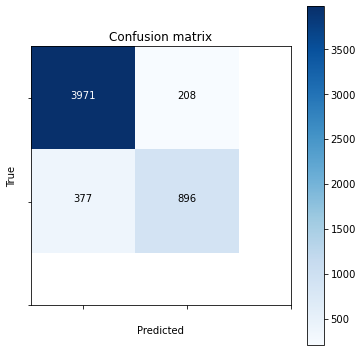

In [18]:
cnf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
target_names=[' ', ' ',' ']
plot_confusion_matrix(cnf_matrix, classes =target_names,
                      title='Confusion matrix') 
plt.show() 

<h3>Print model accuracy<h3>

In [19]:
print(classification_report(y_test, rfc.predict(X_test))) 
#正確率
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, rfc.predict(X_test))
print(accuracy)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4179
           1       0.81      0.70      0.75      1273

    accuracy                           0.89      5452
   macro avg       0.86      0.83      0.84      5452
weighted avg       0.89      0.89      0.89      5452

0.8926999266324285


<h3>Feature importance<h3>

In [20]:
#Feature importance
feature_names= X.keys().tolist()
rfc.feature_importances_.tolist() 
a=rfc.feature_importances_.tolist() 

df = pd.DataFrame({'feature':feature_names,  
                   'feature_importance':rfc.feature_importances_.tolist()}) 
df = df.sort_values(by=['feature_importance'], ascending=False).reset_index(drop=True) 

importance = pd.Series(rfc.feature_importances_,index = df['feature']).sort_values(ascending = False)
print(importance)

feature
Reactions                   0.313403
Aggression                  0.117368
Finishing                   0.104141
SprintSpeed                 0.086377
Crossing                    0.055868
BallControl                 0.051730
LongShots                   0.048066
Agility                     0.031012
ShortPassing                0.029585
Balance                     0.028914
Preferred Foot              0.025654
International Reputation    0.022557
Acceleration                0.017247
Curve                       0.017014
Skill Moves                 0.013744
SlidingTackle               0.009895
Stamina                     0.007340
StandingTackle              0.005573
Weak Foot                   0.005412
Overall                     0.003142
Marking                     0.002128
Jumping                     0.000989
Interceptions               0.000756
Dribbling                   0.000551
Weight                      0.000518
HeadingAccuracy             0.000288
Positioning                 0.